# Manipulation de la librairie networkx

## Construction de réseaux d'interactions à partir de données MITAB.

Le format (MITAB) stocke des paires de protéines en interaction. Dans ce format, chaque colonne porte une information spécifique.
Une description du format est disponible [ici](https://psicquic.github.io/MITAB27Format.html).
Les données d'interactions impliquant les protéines surreprésentées de l'expérience ont été obtenues depuis la base de données [Intact](https://www.ebi.ac.uk/intact/home).
Ces données sont mises à votre disposition dans le fichier `data/proteins.mitab`.

Vous extrairez du fichier les paires d'identifiants uniprot des protéines en interaction.

Ces paires de protéines constituent un réseau d'interaction protéine-protéine que vous allez dessiner à l'aide de la libraire [networkx](https://networkx.org/documentation/stable/reference).
Le code suivant vous est fourni à titre d'exemple.

```python
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
G = nx.Graph()

fig, ax = plt.subplots(figsize=(8, 8))

G.add_edge('a', 'b')
G.add_edge('e', 'b')
G.add_edge('e', 'a')
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=['blue','blue','red'] , node_size=2000)
```

Les positions des noeuds sont paramétrables au travers de l'objet [layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html). Une fois une première représentation du réseau obtenue, affinez celle-ci afin de:

* Écrire les identifiants uniprot dans les noeuds du réseau.
* Faire du diamètre des noeuds une fonction du nombre de partenaires protéiques.
* Faire de la largeur des arêtes une fonction du nombre d'experiences (lignes MITAB) detectant cette interaction
* Colorier les arêtes soutenues par au moins une interaction de type physique entre proteines.


## Croisement des données d'interaction et de protéomique

En utilisant les données d'abondance du fichier `TCL_wt1.tsv`, essayez de modifier le rendu du réseau pour:
* colorier dans une couleur spécifique uniquement les protéines surabondantes dans l'expérience.
* N'afficher que les noeuds des protéines mesurées dans l'experience.
* Utiliser une échelle de couleur continue fonction de l'abondance pour colorier les noeuds.
* colorier les protéines appartenant à des classes GO communes.

In [1]:
import sys, os
workDir = f"{os.getcwd()}/.."
libDir = f"{workDir}/lib"
dataDir= f"{workDir}/data" 

sys.path.append(libDir)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

prot_Df = pd.read_csv("../data/proteins.mitab", sep="\t", header=None)
prot_Df = prot_Df[np.logical_and(
    prot_Df[0].str.startswith("uniprotkb:"),
    prot_Df[1].str.startswith("uniprotkb:"))]
prot_ID = prot_Df[[0,1]].copy()
prot_ID[0] = prot_ID[0].str.strip("uniprotkb:")
prot_ID[1] = prot_ID[1].str.strip("uniprotkb:")

In [3]:
color = []
for i in prot_Df[11]:
    association = i.split('(')[1].split(')')[0]
    association = association.split(' ')
    if association[0] == "physical":
        color.append("red")
    else:
        color.append("black")

In [4]:
#idée faire edge_info[[id,count,edge_color]]
color_dico = pd.DataFrame(color,index=(prot_ID[[0,1]])).to_dict()
color_dico = color_dico[0]

In [5]:
node_info = prot_ID.stack().value_counts()
node_dico = node_info.to_dict()

In [6]:
edge_info = prot_ID.value_counts()
edge_dico = edge_info.to_dict()

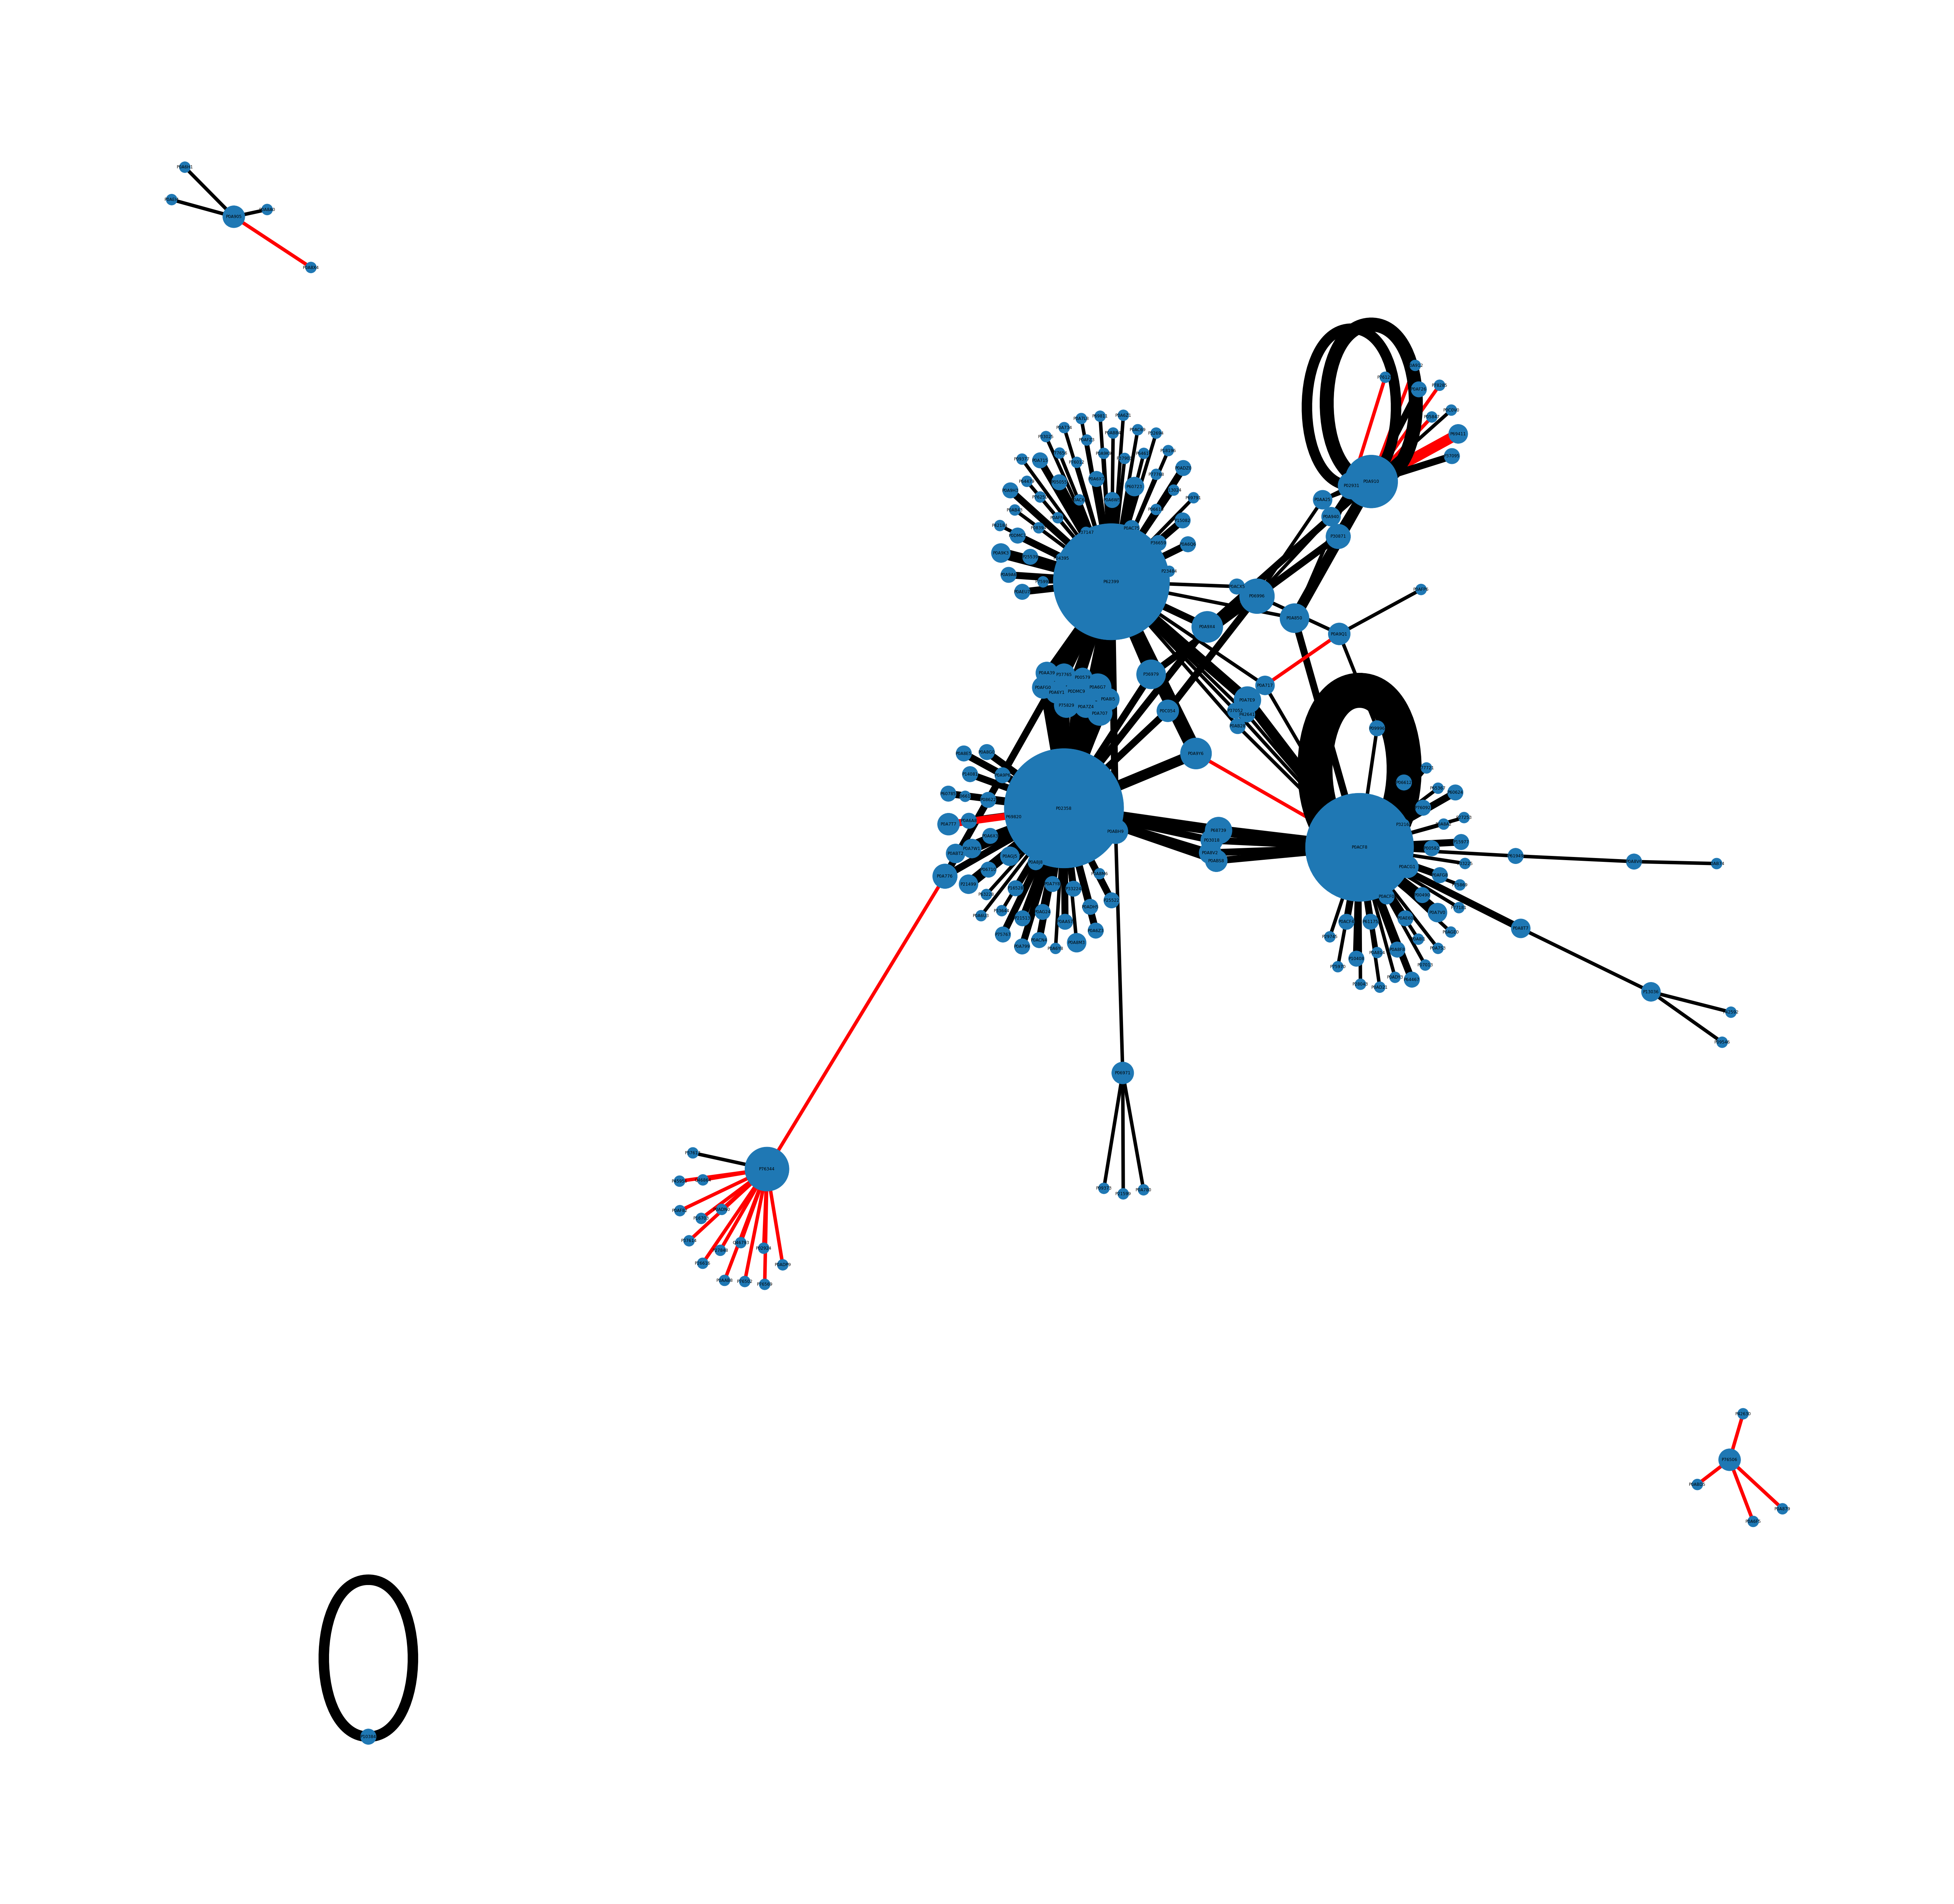

In [17]:
G = nx.Graph()

fig, ax = plt.subplots(figsize=(100, 100))

for couple in edge_dico.keys():
    G.add_edge(*couple)

node_size = []
for node in G.nodes:
    size = node_dico.get(node)
    if size is None :
        size = node_dico.get(node)
    node_size.append(size*1000)    

edge_width = []
edge_color = []
for edge in G.edges:
    width = edge_dico.get((edge[0],edge[1]))
    color = color_dico.get((edge[0],edge[1]))
    if width is None :
        width = edge_dico.get((edge[1],edge[0]))
        color = color_dico.get((edge[1],edge[0]))
    edge_width.append(width*10)
    edge_color.append(color)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True , node_size=node_size,width=edge_width , edge_color = edge_color)

# Correction
```python
with open('../proteins.mitab',"r") as fp:
    for l in fp:
        (idA, idB) = l.split("\t")[0:2]
        (idA,idB) = (idA,idB) if idA > idB else (idB,idA)
        if not idA.startswith("uniprotkb:") or not idB.startswith("uniprotkb:"):
            continue
        idA = idA.replace("uniprotkb:","")
        idB = idB.replace("uniprotkb:","")
        
        if idA not in mitab_protein:
            mitab_proteine[idA] = Protein(idA)
        if idB not in mitab_protein:
            mitab_protein[idB]

for e in G.edges:
    print(G.get_edge_data(*e)) #same as g.get_edge_data(e[0],e[1])
```

Dans le TP3 information sur les colormap

In [18]:
%matplotlib inline
import networkx as nx
from ipywidgets import interact, Dropdown
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

G = nx.Graph()

G.add_edge('a', 'b')
G.add_edge('e', 'b')
G.add_edge('e', 'a')

pos = nx.spring_layout(G)


def update_network(scalar_color):
    fig, ax = plt.subplots(figsize=(10, 10))
    color_list = [ scalar_color for n in G.nodes ]
    nx.draw(G, ax=ax, pos=pos, node_color=color_list)

_ = interact(update_network, scalar_color = [("Blue color", "blue"), ("Red color", "red")])

interactive(children=(Dropdown(description='scalar_color', options=(('Blue color', 'blue'), ('Red color', 'red…